# Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Read Data & Analysis

First we are loading crop production dataset here.

In [2]:
crop_production = pd.read_csv(r'U:\PRANAY\Unified_Mentor\Crop Production Analysis in India\Crop_production.csv')
crop_production.head()

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [3]:
crop_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


We are checking info of data, which show Columns name, Null count and Data types (string, number, boolean etc).

We can see here that dataset have 11 feature columns.

In [4]:
crop_production = crop_production.drop(crop_production.columns[0], axis=1)
crop_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99849 non-null  object 
 1   Crop_Type           99849 non-null  object 
 2   Crop                99849 non-null  object 
 3   N                   99849 non-null  int64  
 4   P                   99849 non-null  int64  
 5   K                   99849 non-null  int64  
 6   pH                  99849 non-null  float64
 7   rainfall            99849 non-null  float64
 8   temperature         99849 non-null  float64
 9   Area_in_hectares    99849 non-null  float64
 10  Production_in_tons  99849 non-null  float64
 11  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 9.1+ MB


In [11]:
rainfall = pd.read_csv(r'U:\PRANAY\Unified_Mentor\Crop Production Analysis in India\final_rainfall.csv')
rainfall.head()

,yearly_rainfall,kharif_rainfall,rabi_rainfall,summer_rainfall
0,3322.06,1925.68,865.94,530.44
1,2569.52,1712.66,241.78,615.08
2,2169.32,1543.76,127.68,497.88
3,1778.88,1220.22,145.76,412.90
4,2459.64,1875.60,140.52,443.52


In [12]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yearly_rainfall  33 non-null     float64
 1   kharif_rainfall  33 non-null     float64
 2   rabi_rainfall    33 non-null     float64
 3   summer_rainfall  33 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


# Data Visualizations

### Visualizing Crop Production in Area (Hectares) with label of Crop_Type

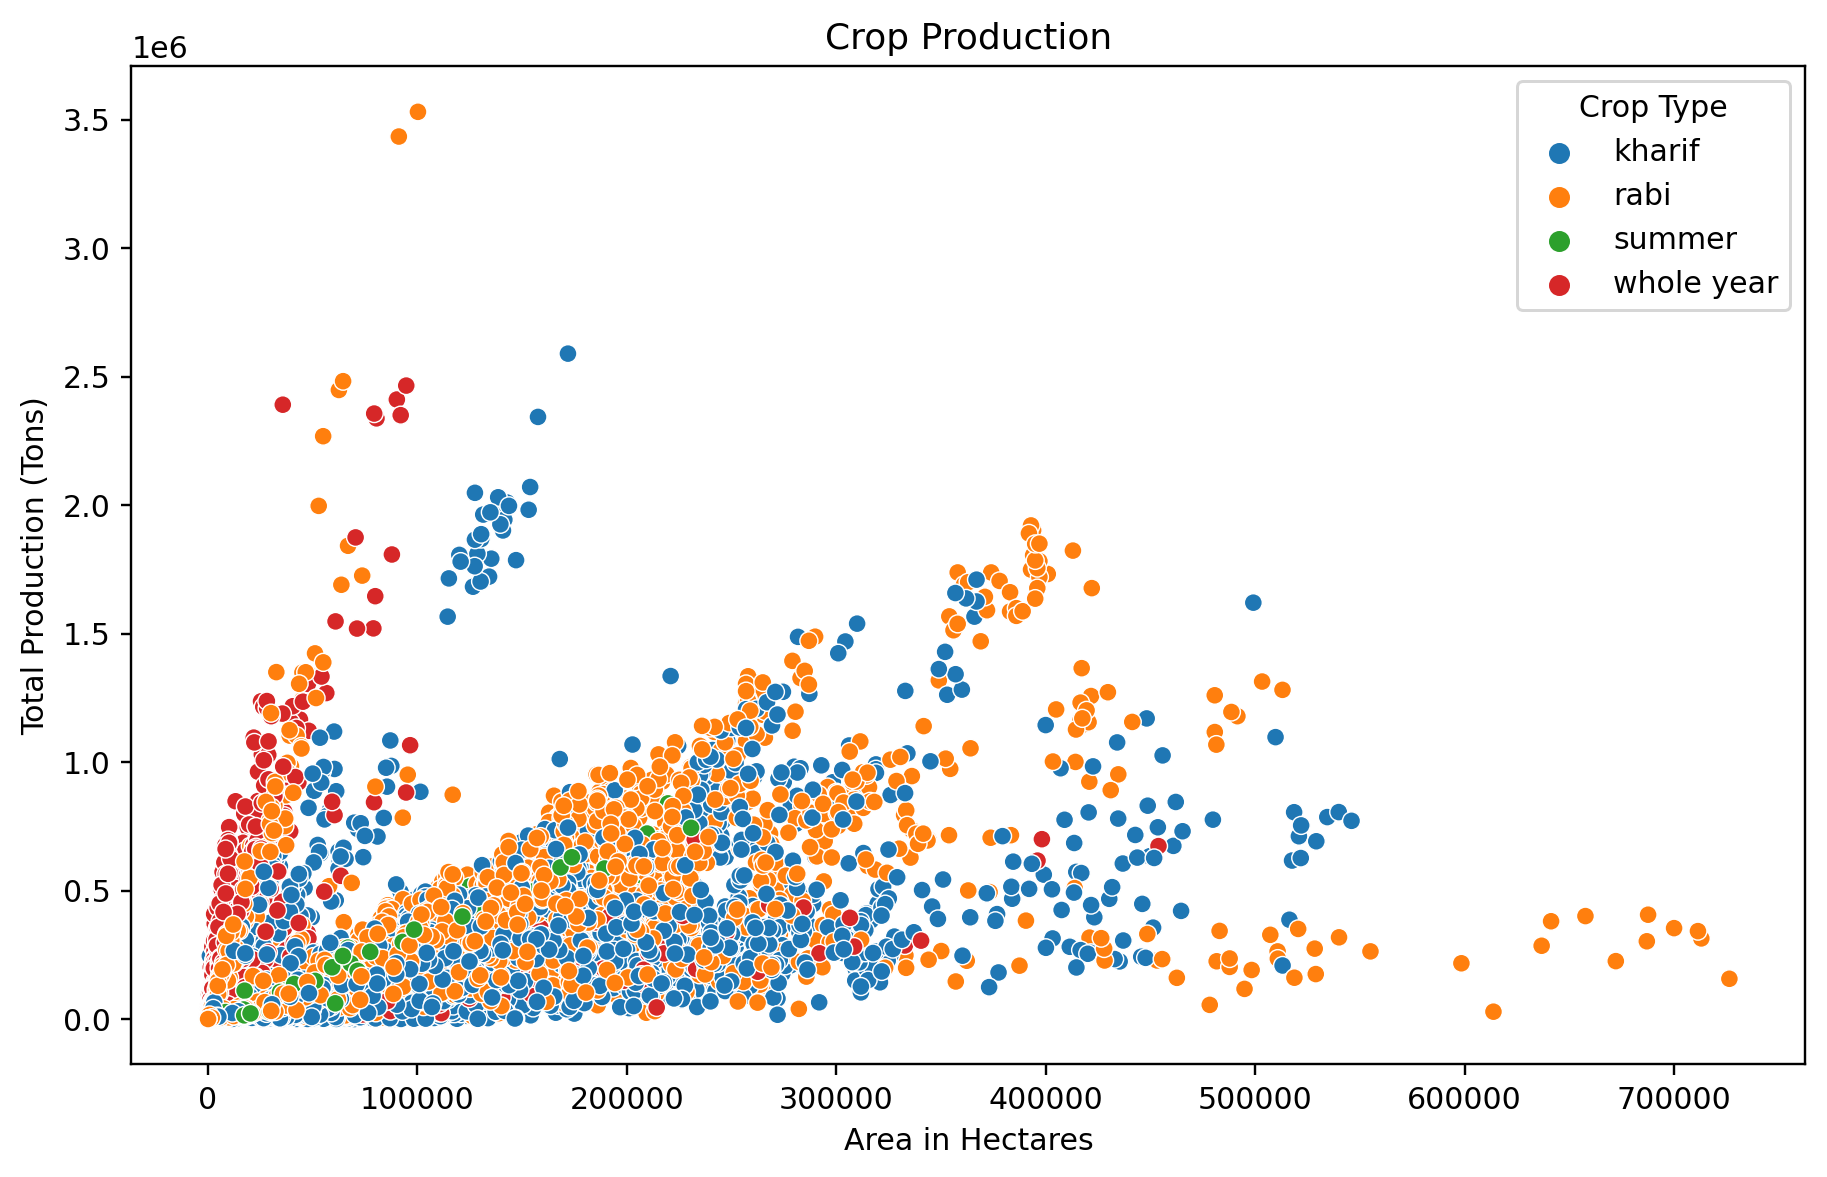

In [5]:
plt.figure(figsize=(10, 6), dpi=216)
sns.scatterplot(x=crop_production['Area_in_hectares'], 
                y=crop_production['Production_in_tons'], hue=crop_production['Crop_Type'])
plt.title('Crop Production')
plt.xlabel('Area in Hectares')
plt.ylabel('Total Production (Tons)')
plt.legend(title='Crop Type');

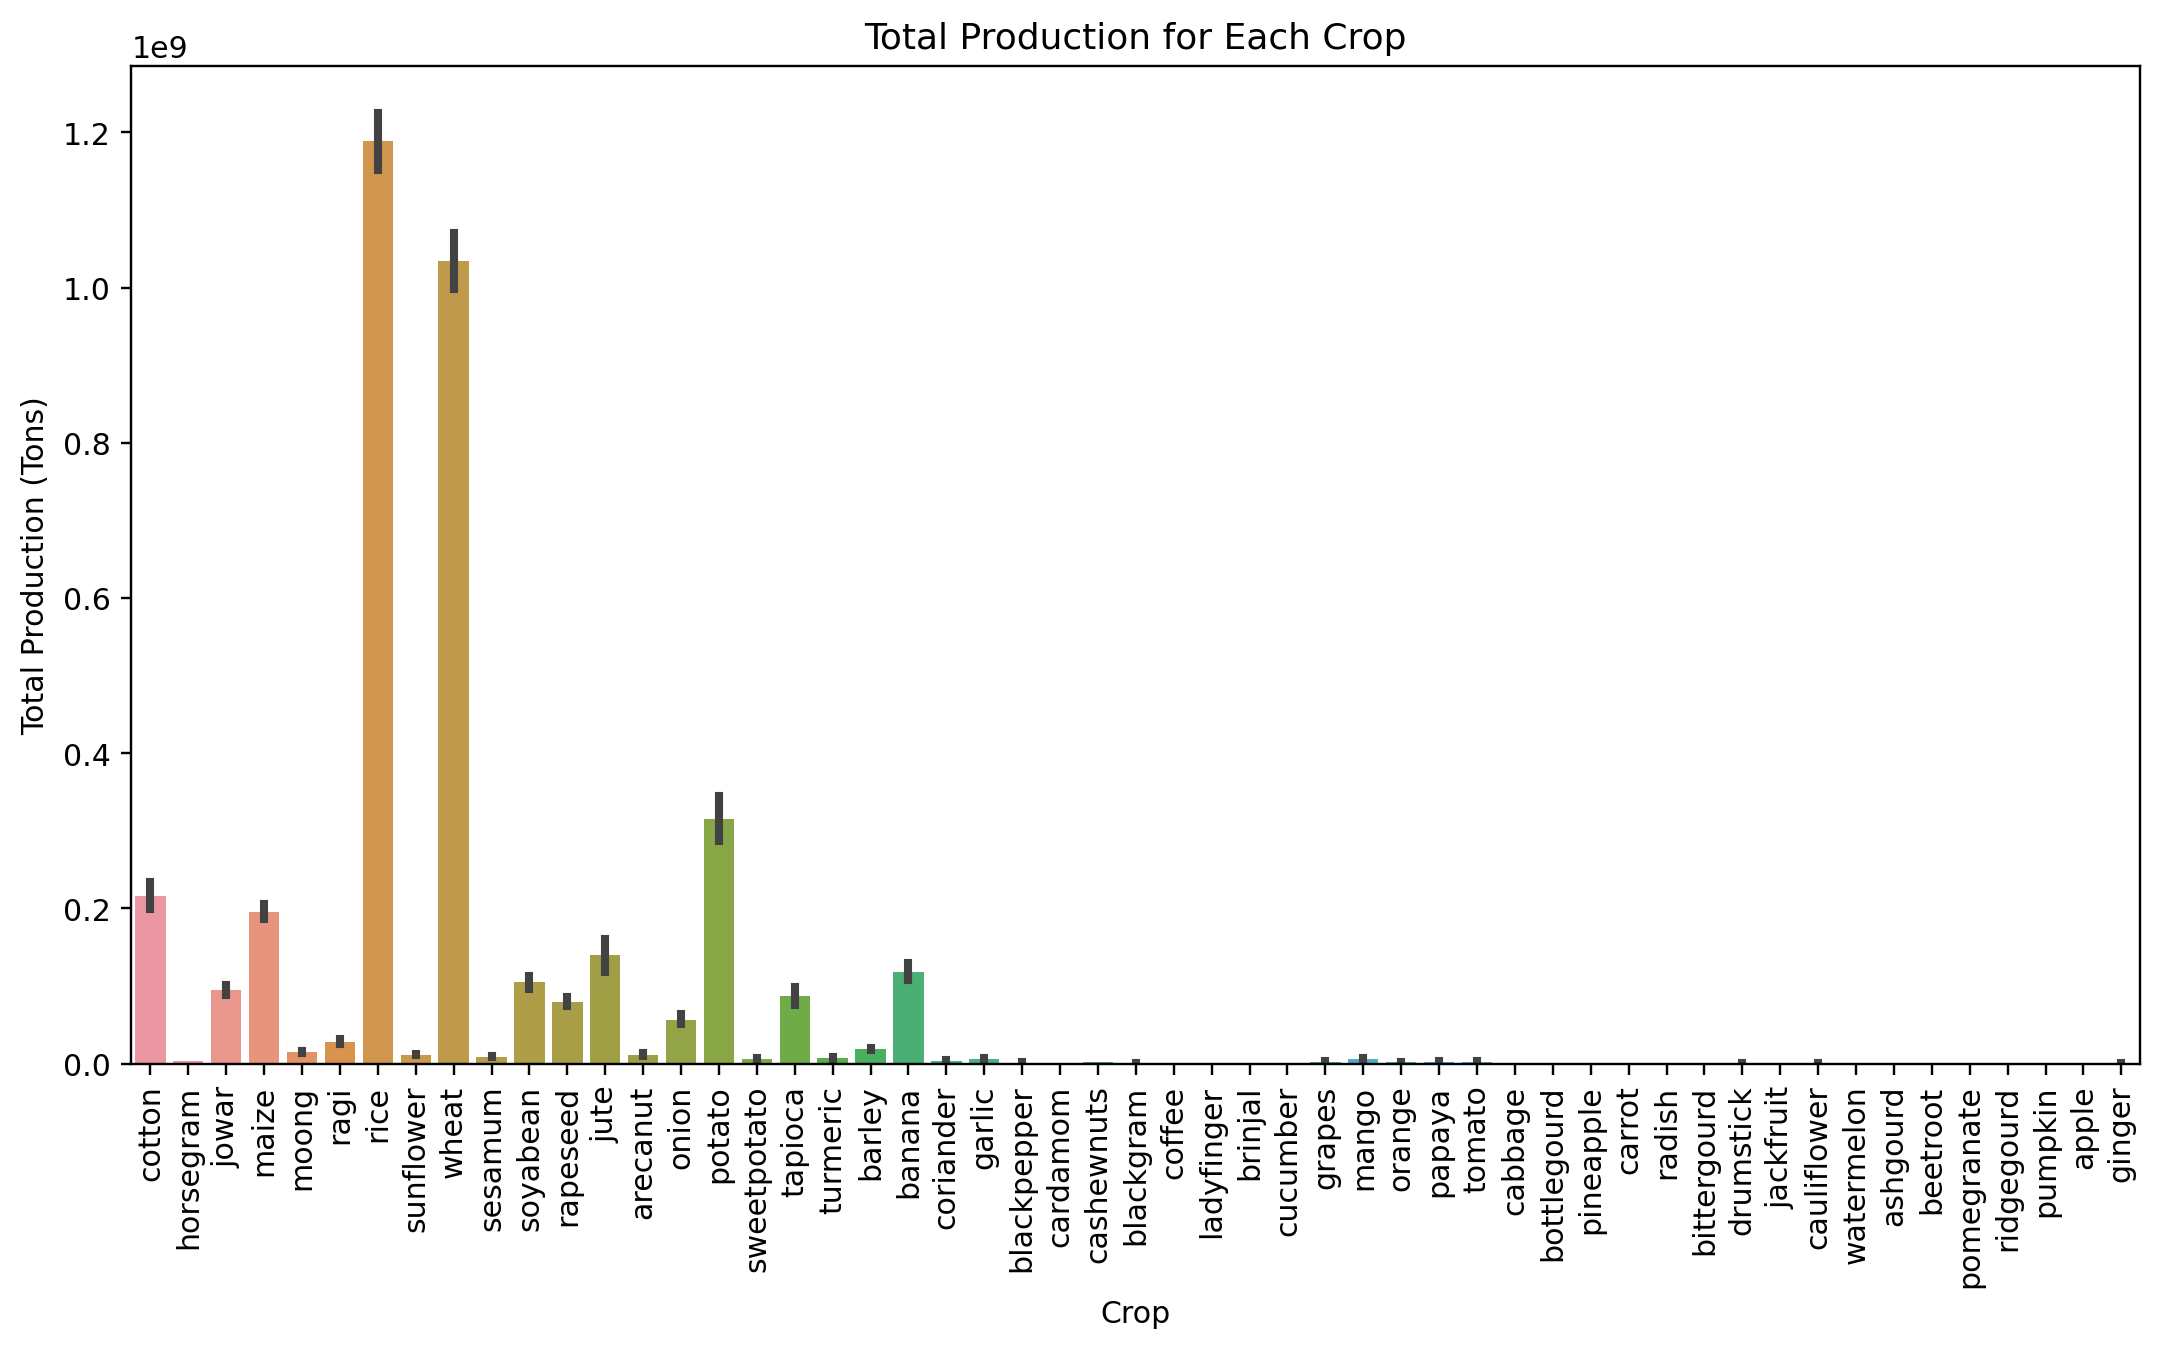

In [6]:
plt.figure(figsize=(12, 6), dpi=216)
sns.barplot(data=crop_production, x='Crop', y='Production_in_tons', estimator=sum)
plt.xlabel('Crop')
plt.ylabel('Total Production (Tons)')
plt.title('Total Production for Each Crop')
plt.xticks(rotation=90);

### Visualizing which crops have most production!

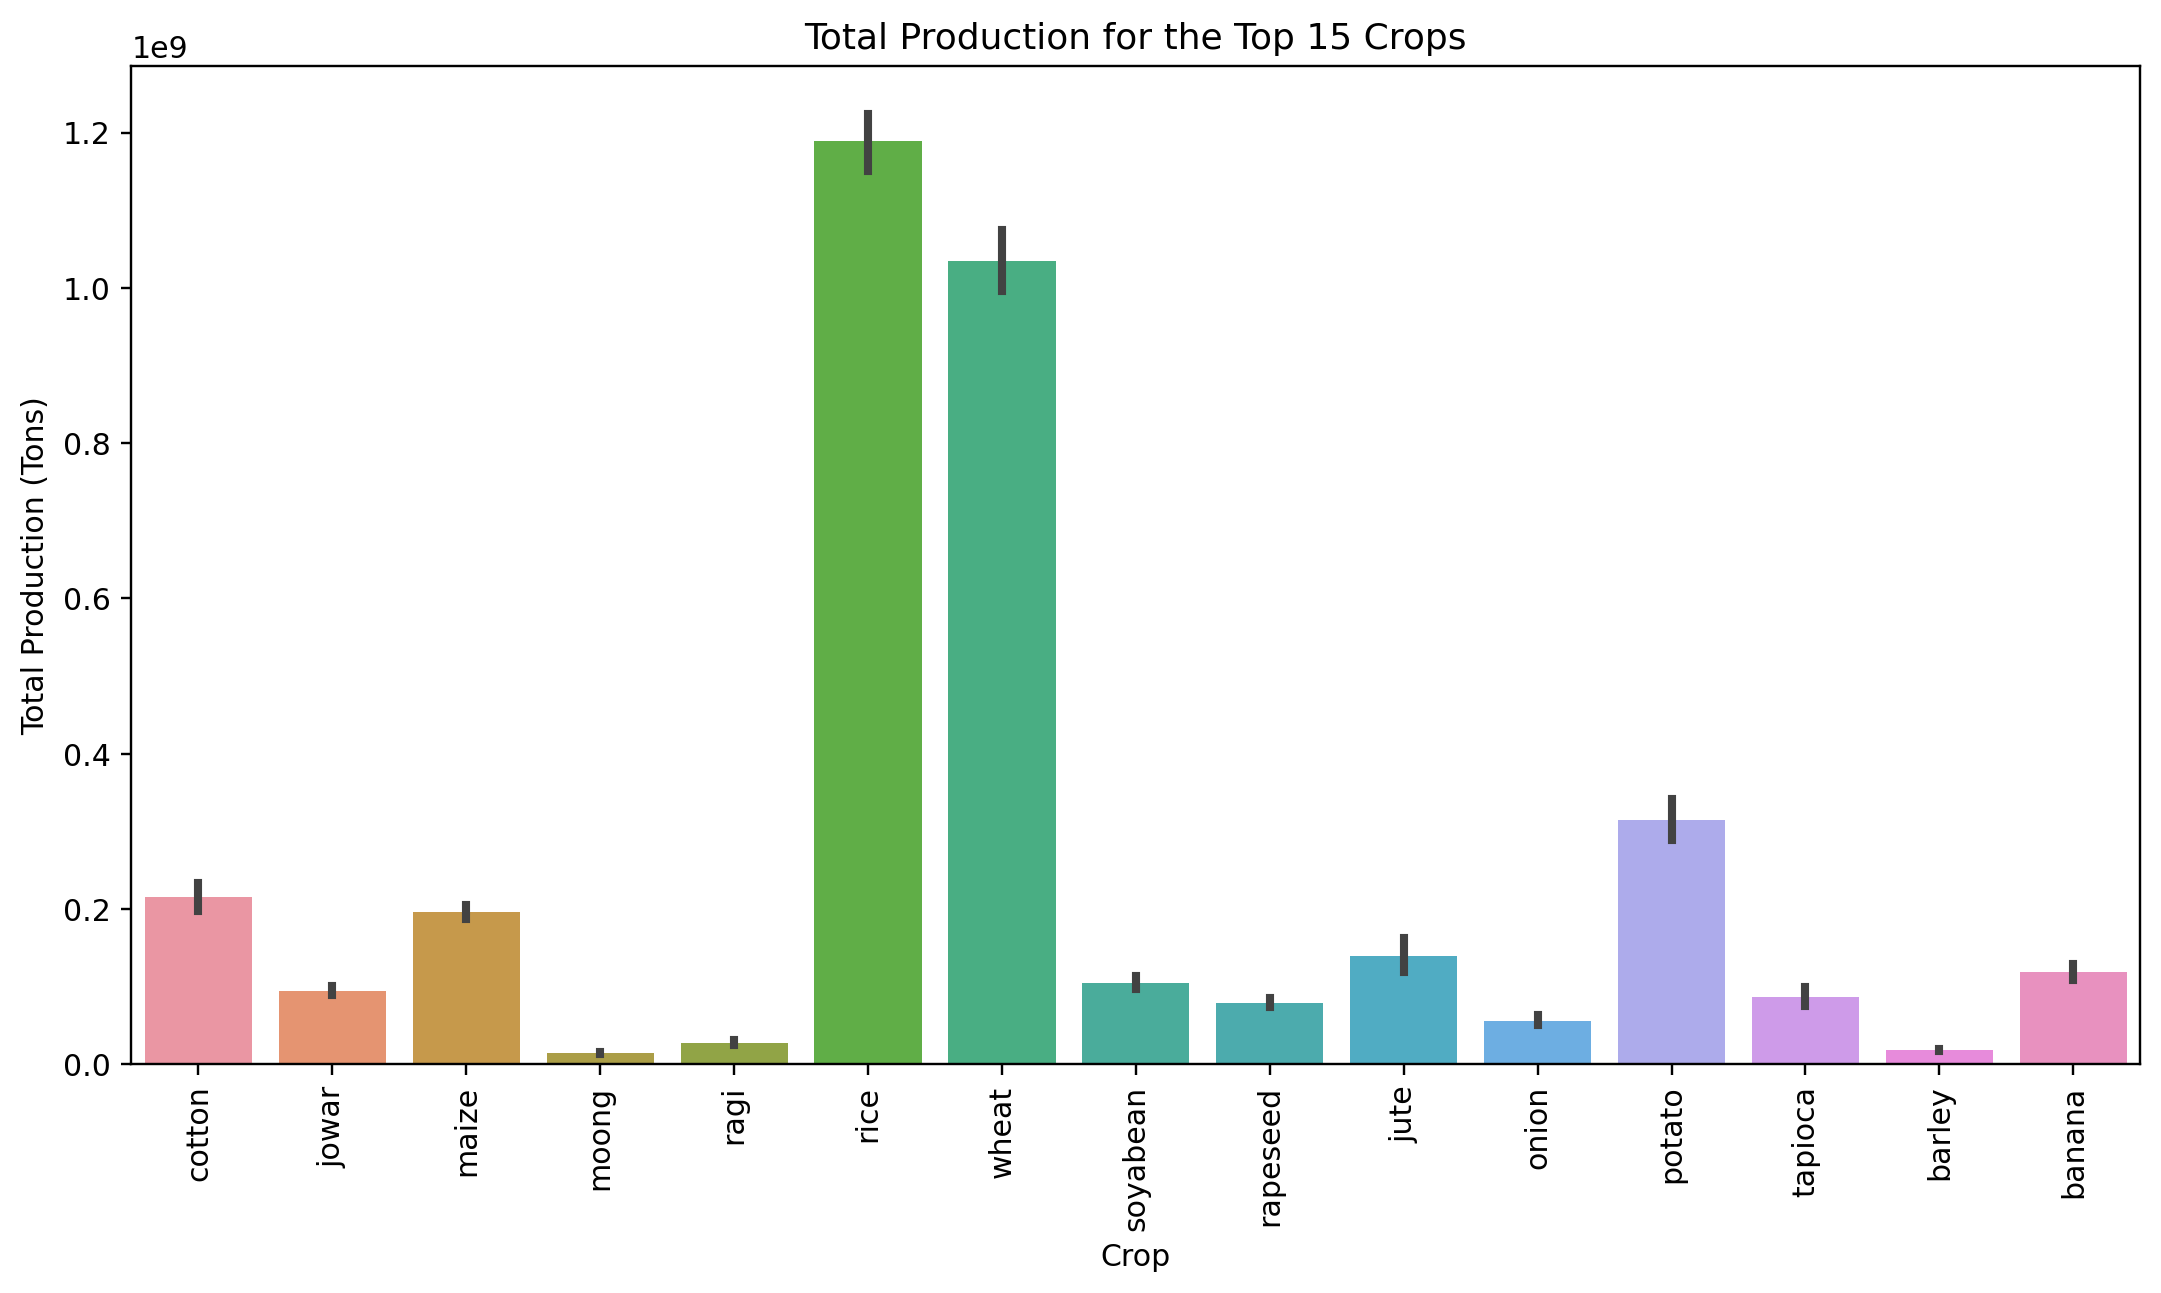

In [7]:
top_15_crops = crop_production.groupby('Crop')['Production_in_tons'].sum().nlargest(15).index
filtered_df = crop_production[crop_production['Crop'].isin(top_15_crops)]

plt.figure(figsize=(12, 6), dpi=216)
sns.barplot(data=filtered_df, x='Crop', y='Production_in_tons', estimator=sum)
plt.xlabel('Crop')
plt.ylabel('Total Production (Tons)')
plt.title('Total Production for the Top 15 Crops')
plt.xticks(rotation=90);

Here we can see that Rice and Wheat productions are more than 1 ton in plot.

### Visualizing which state producing more production!

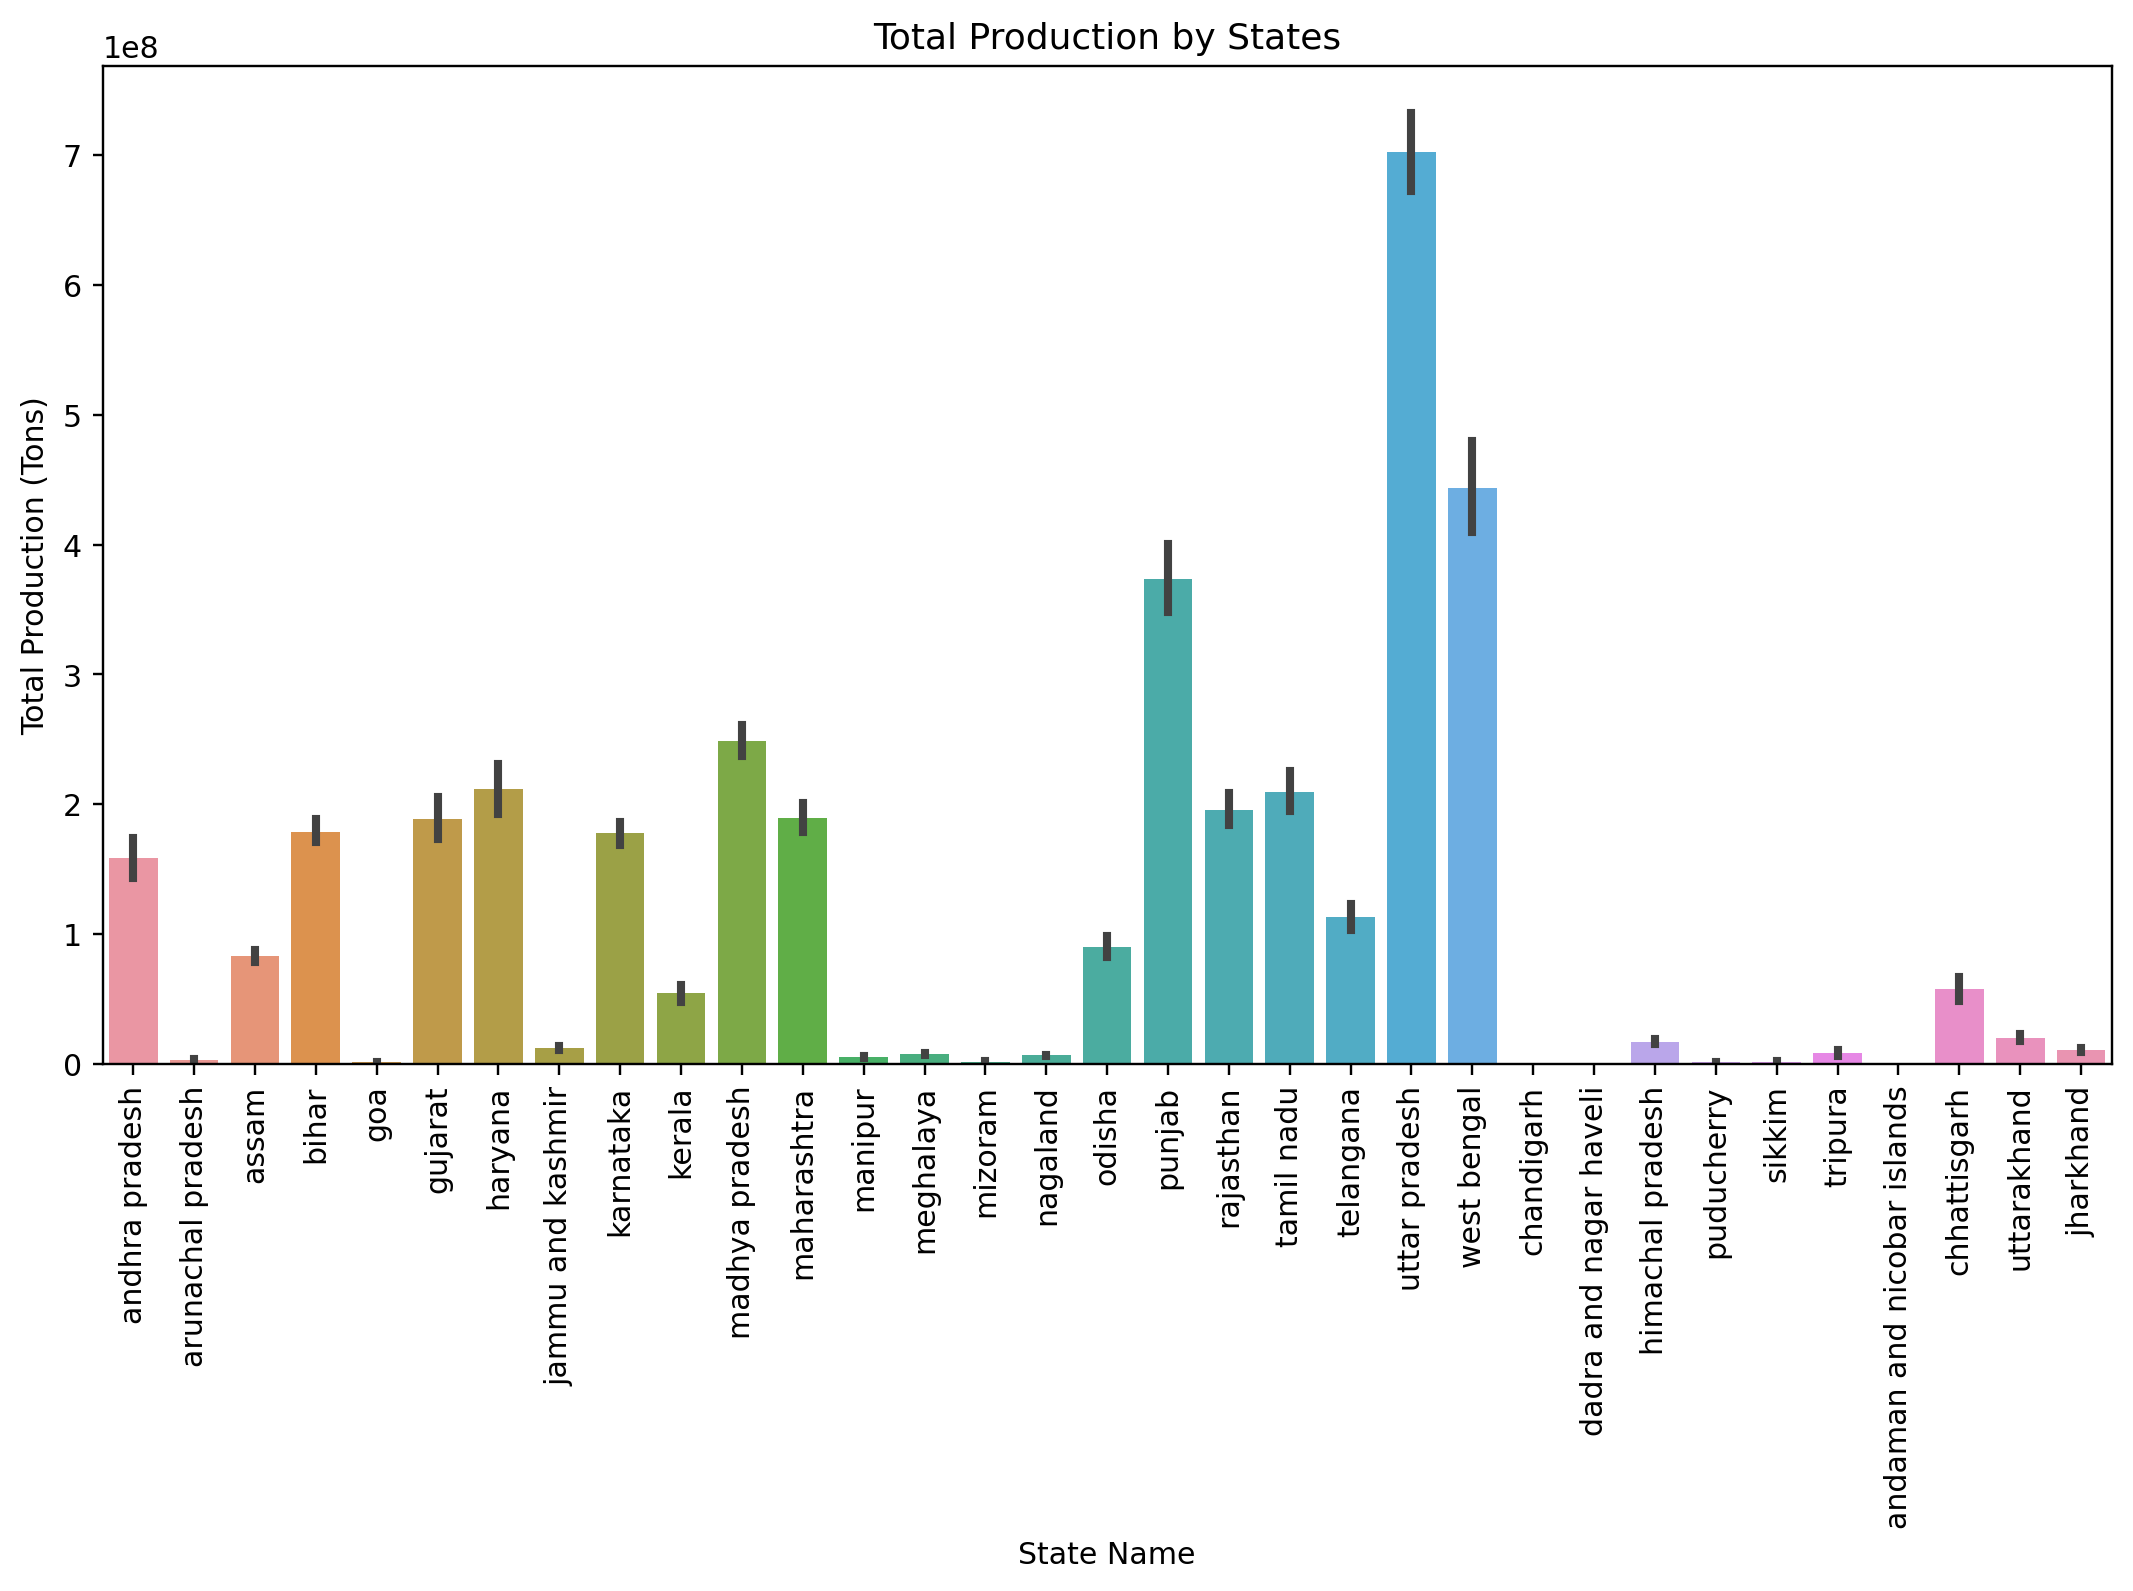

In [8]:
plt.figure(figsize=(12, 6), dpi=216)
sns.barplot(data=crop_production, x='State_Name', y='Production_in_tons', estimator=sum)
plt.xlabel('State Name')
plt.ylabel('Total Production (Tons)')
plt.title('Total Production by States')
plt.xticks(rotation=90);

Now we can see in plot that Uttar Pradesh, West Bengal and Panjab have most productions

### Visualizing Yeild Ton per Hectare!

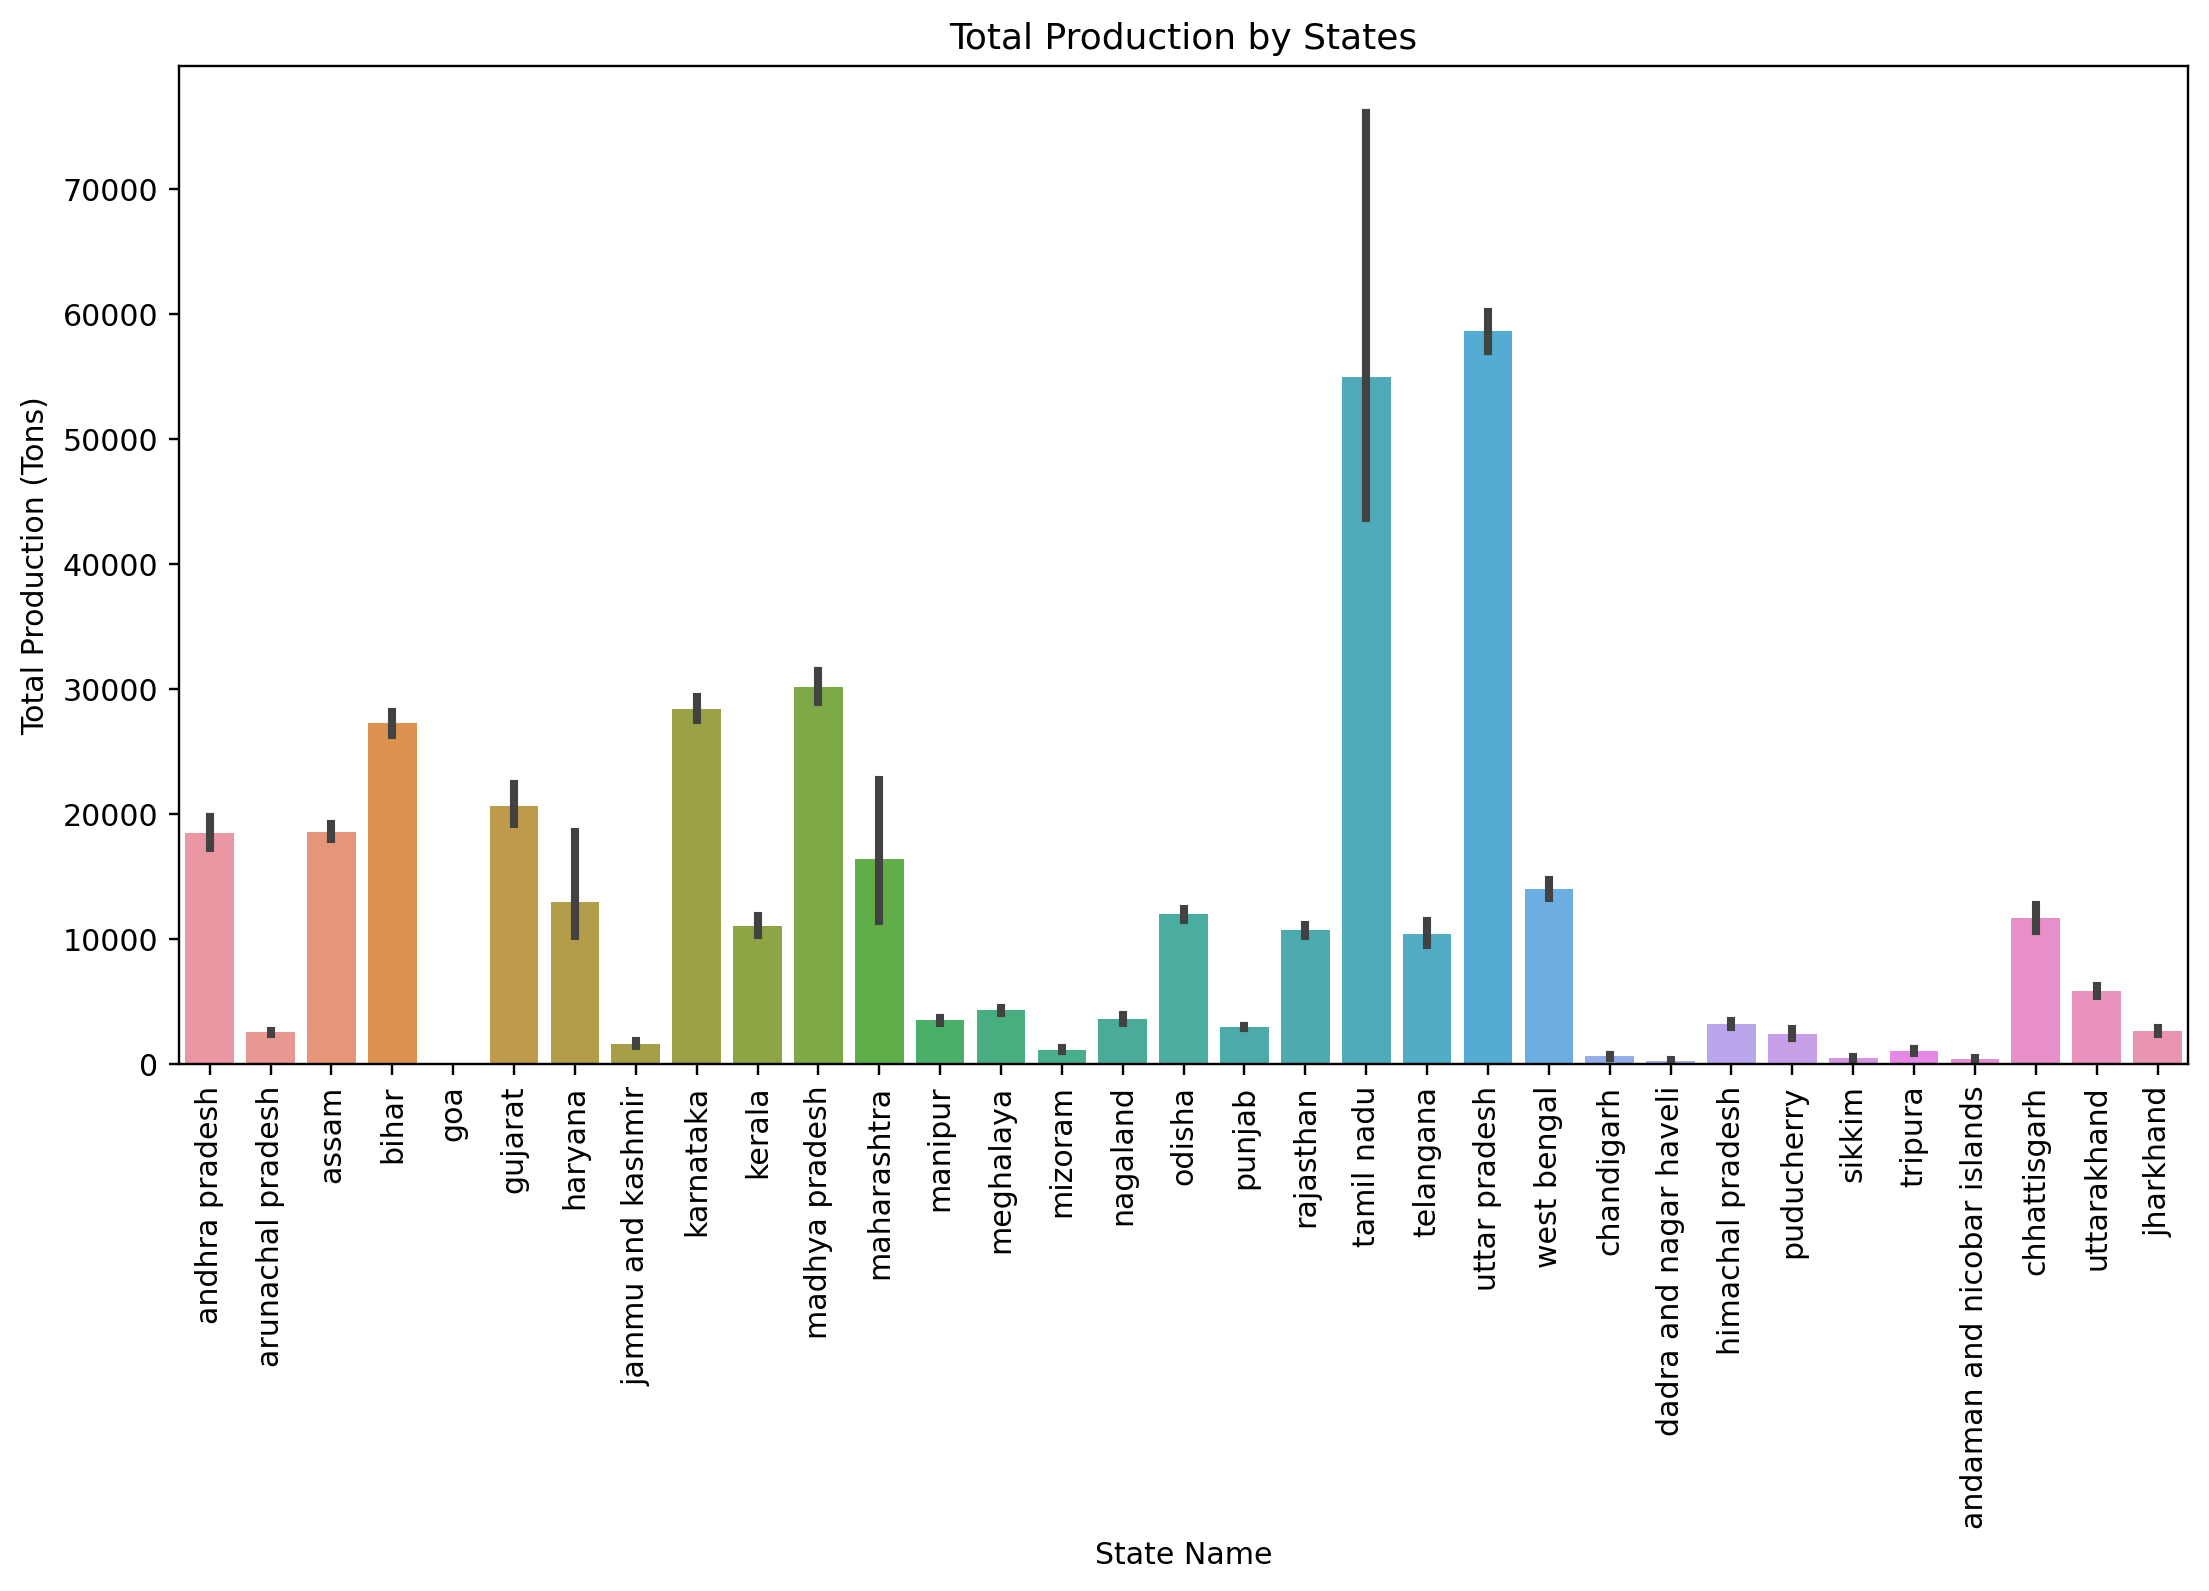

In [9]:
plt.figure(figsize=(12, 6), dpi=216)
sns.barplot(data=crop_production, x='State_Name', y='Yield_ton_per_hec', estimator=sum)
plt.xlabel('State Name')
plt.ylabel('Total Production (Tons)')
plt.title('Total Production by States')
plt.xticks(rotation=90);

Next we can see that Uttar Pradesh and Tamil Nadu have most yield ton per hectares.

In [10]:
crop_production.columns

Index(['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')

### Visualizing which crop time have most rainfall!

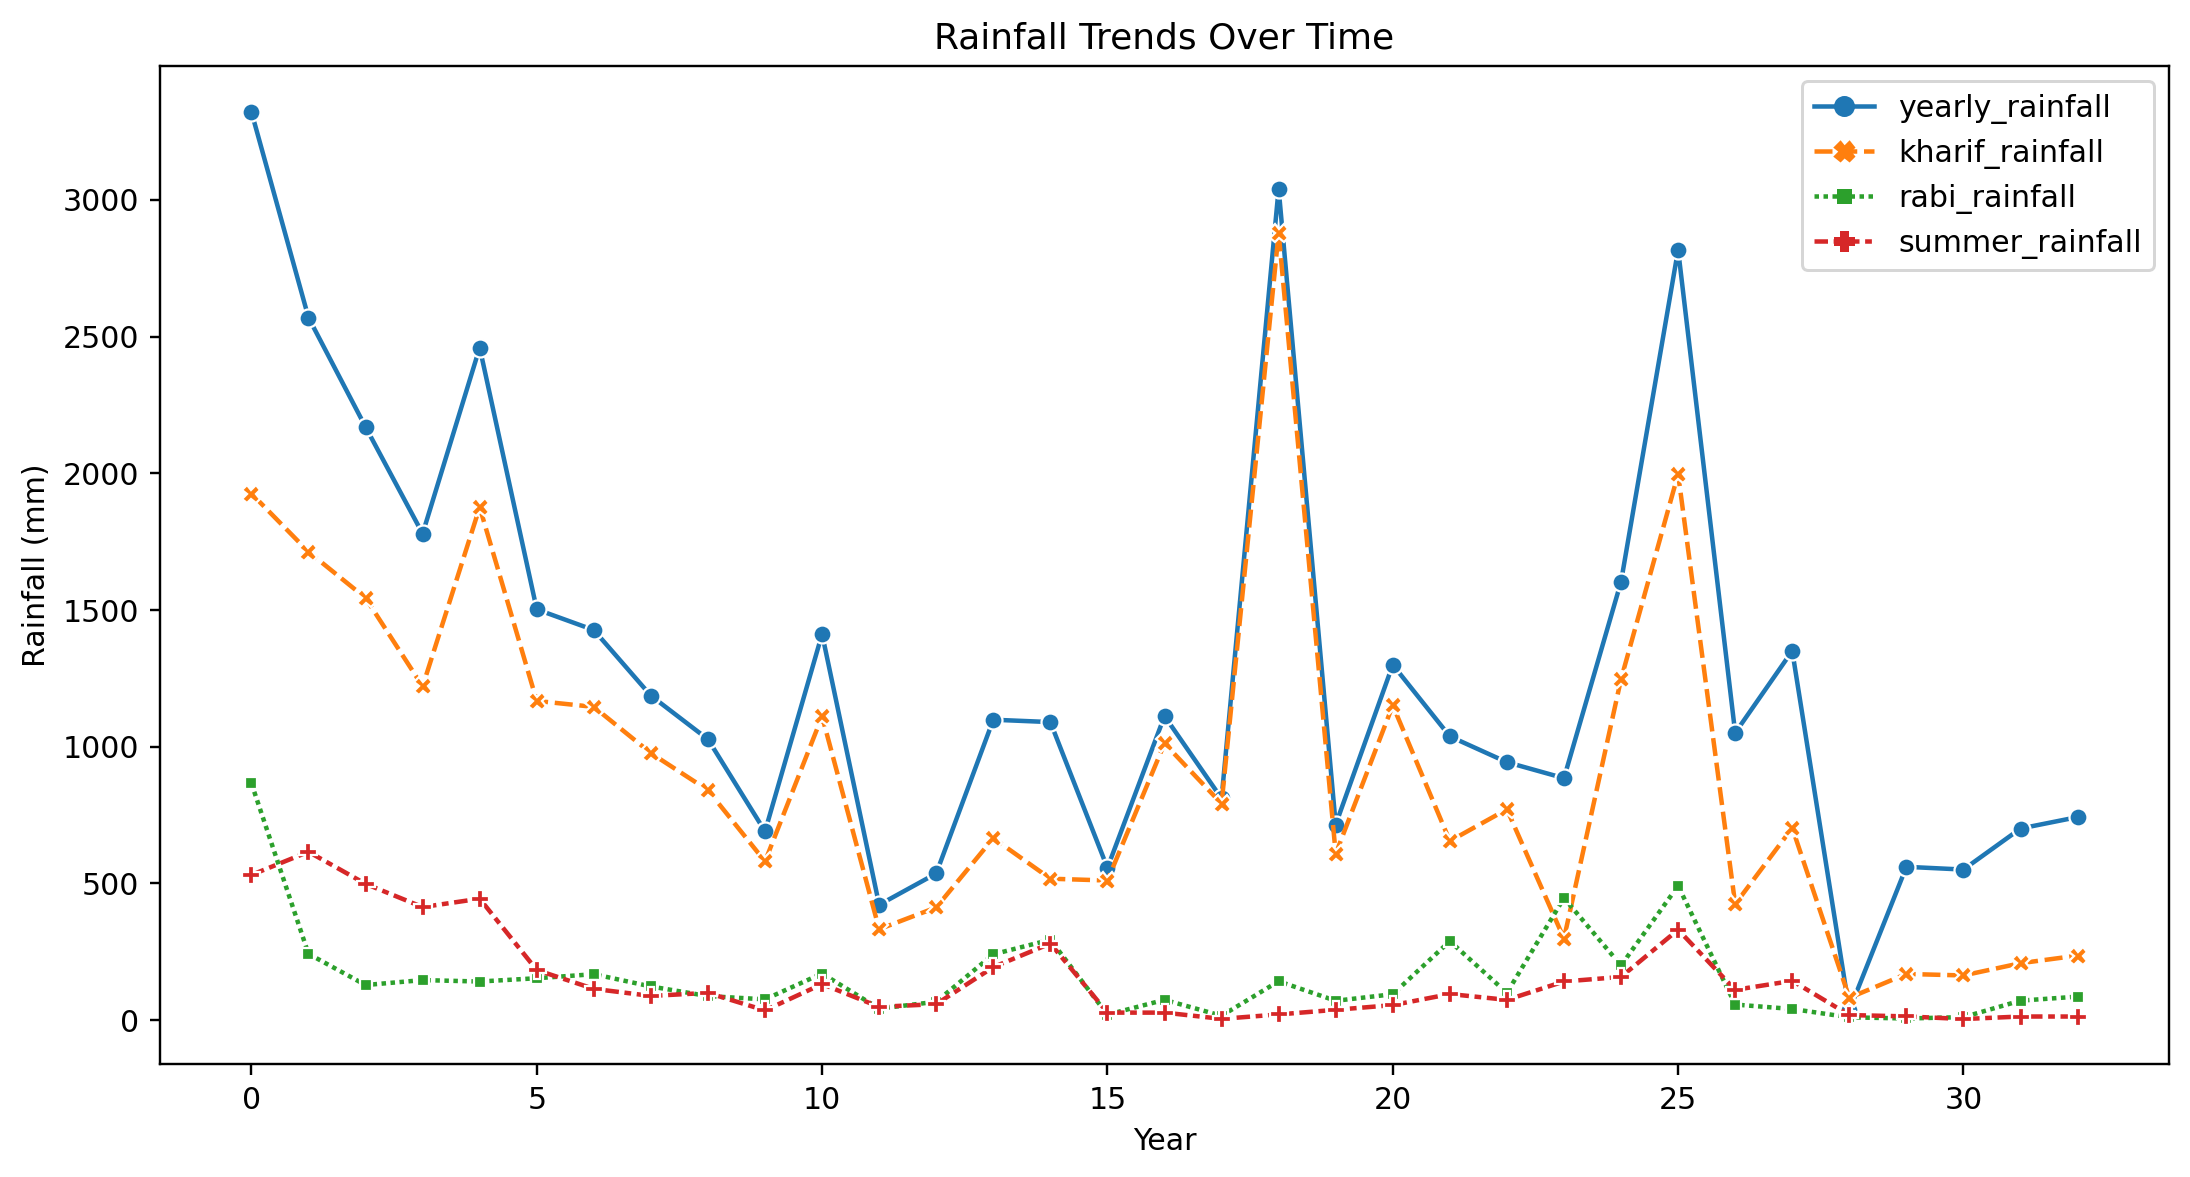

In [14]:
plt.figure(figsize=(12, 6), dpi=216)
sns.lineplot(data=rainfall, markers=True)
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Trends Over Time');

And we can see that Kharif crops time have most rainfall because them need more water to grow.

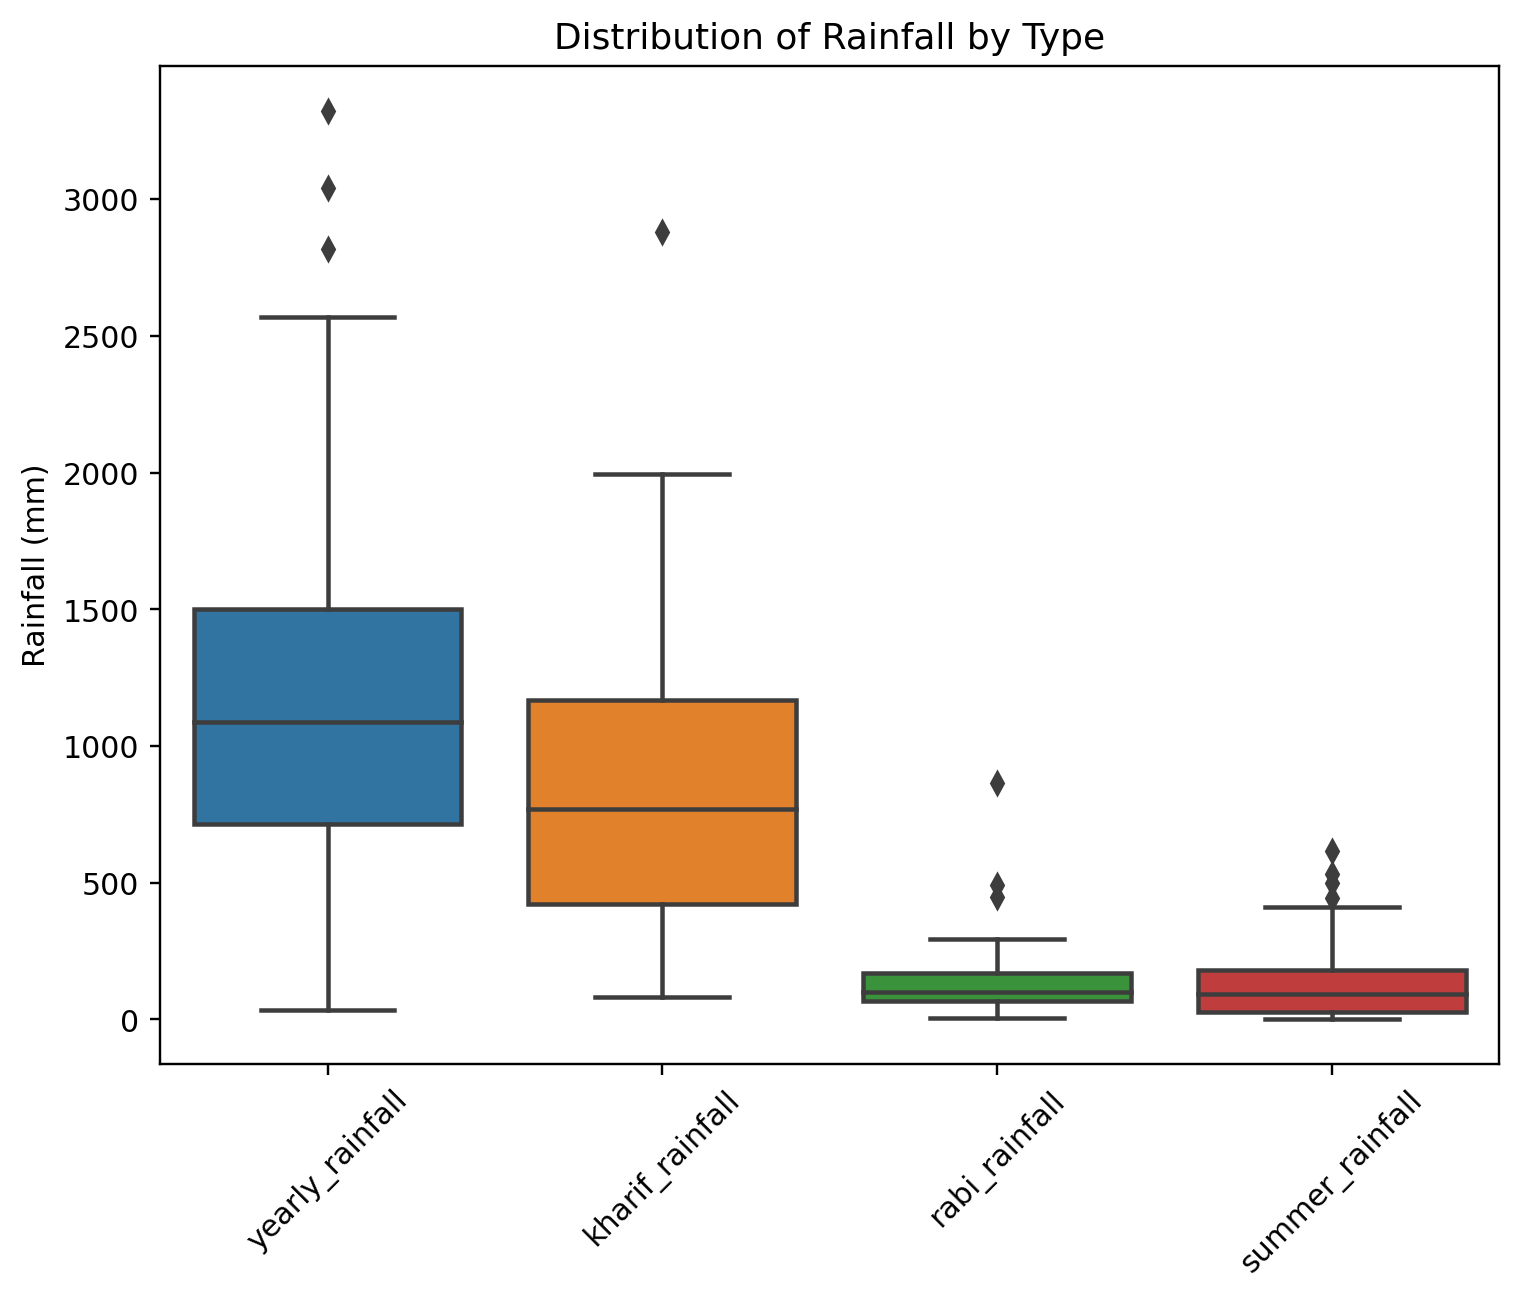

In [15]:
plt.figure(figsize=(8, 6), dpi=216)
sns.boxplot(data=rainfall, orient='vertical')
plt.ylabel('Rainfall (mm)')
plt.title('Distribution of Rainfall by Type')
plt.xticks(rotation=45);

<Figure size 1728x1296 with 0 Axes>

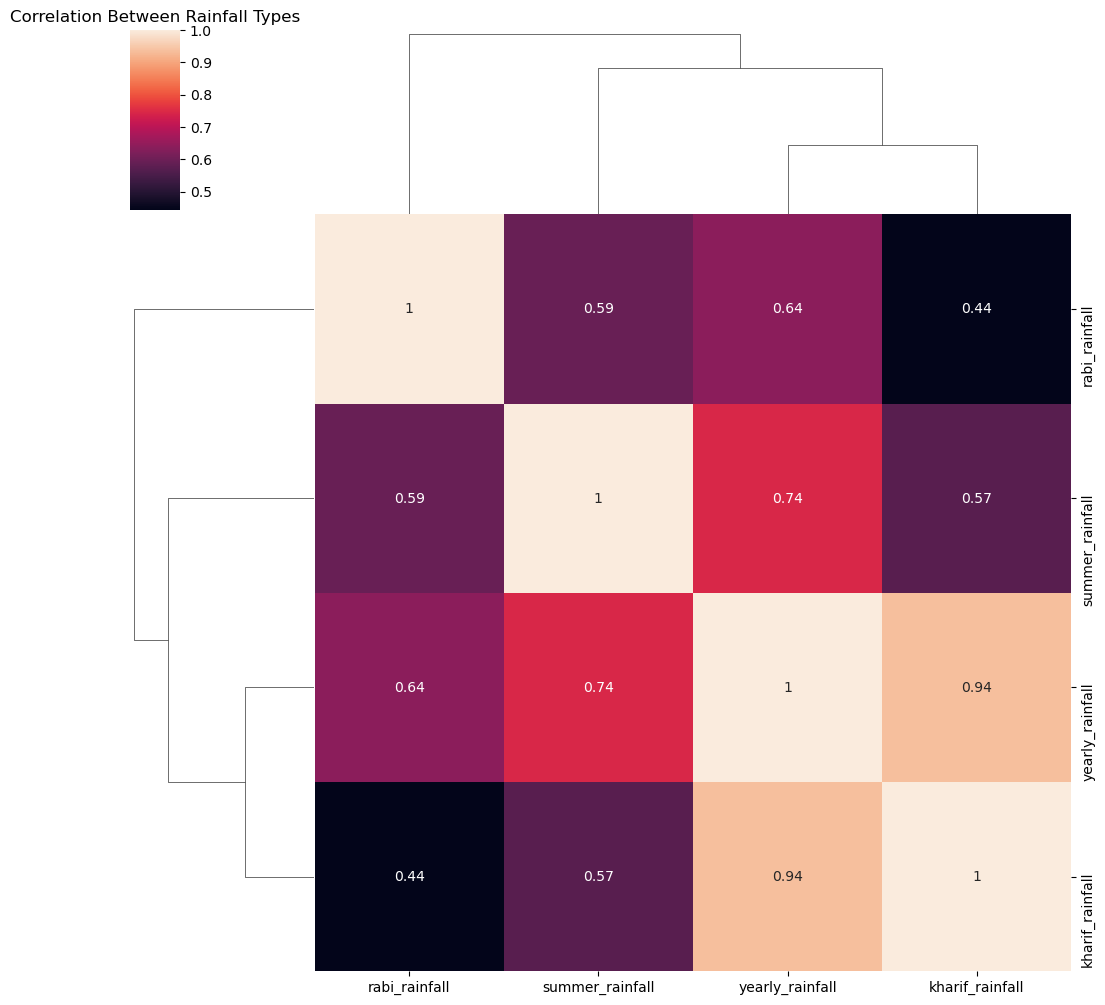

In [16]:
correlation_matrix = rainfall.corr()
plt.figure(figsize=(8, 6), dpi=216)
sns.clustermap(correlation_matrix, annot=True)
plt.title('Correlation Between Rainfall Types');

# Overview

### In the above notebook by the datasets,

We saw which crop have most production.

Which state production most crops by hectares and yield ton per hectares.

We saw in rainfall datasets that which crops need most water to grow.